In [1]:
'''
source:
https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
'''

'\nsource:\nhttps://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568\n'

In [66]:
#!pip install gensim

In [67]:
#!pip install paramiko

In [68]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [69]:
df = pd.read_csv('stack-overflow-data.csv')

In [70]:
df.shape

(40000, 2)

In [71]:
df.ndim

2

In [72]:
df.head()

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [73]:
df.tail()

,post,tags
39995,different output if at end of function rather ...,c++
39996,multiple arrays is there a way to access/stor...,iphone
39997,c - how to differentiate a second same key pre...,c
39998,state.go not working (#! & url is being append...,angularjs
39999,understanding the mechanisms of intentservice ...,android


In [74]:
df.head(23)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python
5,how to give alias name for my website i have ...,asp.net
6,window.open() returns null in angularjs it wo...,angularjs
7,identifying server timeout quickly in iphone ...,iphone
8,unknown method key error in rails 2.3.8 unit ...,ruby-on-rails
9,from the include how to show and hide the con...,angularjs


In [75]:
df.dtypes

post    object
tags    object
dtype: object

In [76]:
df['tags'].describe()

count     40000
unique       20
top         css
freq       2000
Name: tags, dtype: object

In [77]:
df.describe()

,post,tags
count,40000,40000
unique,40000,20
top,represent a small bilingual lexicon as a javas...,css
freq,1,2000


In [78]:
dfnull = df[pd.isnull(df['tags'])]

In [79]:
dfnull

,post,tags


In [80]:
len(dfnull)

0

In [81]:
df = df[pd.notnull(df['tags'])]

In [82]:
df

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python
5,how to give alias name for my website i have ...,asp.net
6,window.open() returns null in angularjs it wo...,angularjs
7,identifying server timeout quickly in iphone ...,iphone
8,unknown method key error in rails 2.3.8 unit ...,ruby-on-rails
9,from the include how to show and hide the con...,angularjs


In [83]:
df.head(5)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python


In [84]:
words_count = df['post'].apply(lambda x: len(x.split(' '))).sum()

In [85]:
words_count

10286120

In [86]:
my_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php',
           'ios','javascript','python','c','css','android','iphone',
           'sql','objective-c','c++','angularjs','.net']

In [87]:
my_tags

['java',
 'html',
 'asp.net',
 'c#',
 'ruby-on-rails',
 'jquery',
 'mysql',
 'php',
 'ios',
 'javascript',
 'python',
 'c',
 'css',
 'android',
 'iphone',
 'sql',
 'objective-c',
 'c++',
 'angularjs',
 '.net']

In [88]:
plt.figure(figsize = (10, 3))

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

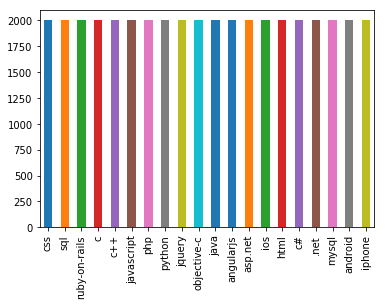

In [89]:
df.tags.value_counts().plot(kind='bar')

In [90]:
def print_plot(index):
    example = df[df.index == index][['post', 'tags']].values[0]
    #print(example)
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

In [91]:
print_plot(10)

when we need interface c# <blockquote>    <strong>possible duplicate:</strong><br>   <a href= https://stackoverflow.com/questions/240152/why-would-i-want-to-use-interfaces >why would i want to use interfaces </a>   <a href= https://stackoverflow.com/questions/9451868/why-i-need-interface >why i need interface </a>    </blockquote>     i want to know where and when to use it     for example    <pre><code>interface idemo {  // function prototype  public void show(); }  // first class using the interface class myclass1 : idemo {  public void show()  {   // function body comes here   response.write( i m in myclass );  }  }  // second class using the interface class myclass2 : idemo {  public void show()   {   // function body comes here   response.write( i m in myclass2 );   response.write( so  what  );  } </code></pre>   these two classes has the same function name with different body. this can be even achieved without interface. then why we need an interface where and when to use it
Tag:

In [92]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [93]:
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [94]:
df['post'] = df['post'].apply(clean_text)

In [95]:
print_plot(10)

need interface c# possible duplicate would want use interfaces need interface want know use example interface idemo function prototype public void show first class using interface class myclass1 idemo public void show function body comes responsewrite myclass second class using interface class myclass2 idemo public void show function body comes responsewrite myclass2 responsewrite two classes function name different body even achieved without interface need interface use
Tag: c#


In [96]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

3424297

In [97]:
X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [100]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=my_tags))

accuracy 0.7395
               precision    recall  f1-score   support

         java       0.63      0.65      0.64       613
         html       0.94      0.86      0.90       620
      asp.net       0.87      0.92      0.90       587
           c#       0.70      0.77      0.73       586
ruby-on-rails       0.73      0.87      0.79       599
       jquery       0.72      0.51      0.60       589
        mysql       0.77      0.74      0.75       594
          php       0.69      0.89      0.78       610
          ios       0.63      0.59      0.61       617
   javascript       0.57      0.65      0.60       587
       python       0.70      0.50      0.59       611
            c       0.79      0.78      0.79       594
          css       0.84      0.59      0.69       619
      android       0.66      0.84      0.74       574
       iphone       0.64      0.83      0.72       584
          sql       0.66      0.64      0.65       578
  objective-c       0.79      0.77      0.78    